<p><h3>1. Ler os dados</h3></p>
<span>Ler os dados  no arquivo csv, <b>Real_State_Properati</b></span>

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import folium
from folium.plugins import HeatMap

df = pd.read_csv("Real_State_Properati.csv", sep = '\t')
df


,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


<p><h3>2. Limpeza de dados</h3></p>
<span>Preparar os dados obtidos da leitura do arquivo csv</span>

<h4>2.1. Substituição de dados</h4>

In [186]:
dfdiffsurfacezerado = df['surface_total_in_m2'] != 0 
df2 = df[dfdiffsurfacezerado]
dfGroup = df2.groupby(['property_type', 'place_name']).mean('surface_total_in_m2')
dfmerge = pd.merge(df, dfGroup, on=['property_type', 'place_name'])
dfmerge = dfmerge.rename(columns={'surface_total_in_m2_y': 'surface_total_in_m2_media'})
dfmerge['surface_total_in_m2_Final'] = np.where(dfmerge['surface_total_in_m2_x']== 0, dfmerge['surface_total_in_m2_media'] , dfmerge['surface_total_in_m2_x'])
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000,350.0


In [187]:
dfmerge=dfmerge.drop(columns={'surface_total_in_m2_x','lat_y','lon_y','price_y'})
dfmerge = dfmerge.rename(columns={'lat_x': 'lat'})
dfmerge = dfmerge.rename(columns={'lon_x': 'lon'})
dfmerge = dfmerge.rename(columns={'price_x': 'price'})
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0


<h4>2.2. Conversão de dados</h4>

Adicionando uma coluna <b>price_usd</b> no dataframe, na qual valores que estão em peso argentino seram convertido para dolar americano

In [188]:
dfmerge['price_usd']= dfmerge.apply(lambda x: x.price * 0.0085 if x.currency!='USD' else x.price,axis=1)
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0,62000.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0,239000.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0,53000.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0,245000.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0,165000.0
...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0,330000.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0,270000.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0,695000.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0,420000.0


<h4>2.3. Criar informações baseadas nos dados</h4>

In [189]:
dfmerge['preco_metro'] = dfmerge['price_usd'] / dfmerge['surface_total_in_m2_Final']
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd,preco_metro
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0,62000.0,1127.272727
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0,239000.0,1707.142857
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0,53000.0,1892.857143
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0,245000.0,751.533742
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0,165000.0,1100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0,330000.0,2307.692308
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0,270000.0,1800.000000
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0,695000.0,1997.126437
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0,420000.0,1200.000000


In [333]:
############################## outlier MUITO ALTO
indexNames = dfmerge[ dfmerge['preco_metro'] > 206332 ].index

dfmerge.drop(indexNames , inplace=True)

<p><h3>3. Analisando os dados</h3></p>
<span>Demonstrar através de gráficos as informações obtidas dos dados do arquivo csv</span>

<h4>3.1. Preço do metro quadrado por bairro</h4>

In [191]:

medias_bairro = dfmerge.groupby(['place_name'])['preco_metro'].agg(['max','min','mean','median'])
medias_bairro

,max,min,mean,median
place_name,,,,
Abasto,2857.142857,914.893617,1998.555785,2009.132420
Agronomía,2638.297872,860.323887,2088.124134,2187.500000
Almagro,24387.804878,70.512821,2541.883604,2121.212121
Balvanera,13066.666667,467.796610,1964.499761,1850.925926
Barracas,29562.500000,318.750000,1990.802533,1827.956989
...,...,...,...,...
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197
Villa Santa Rita,2403.846154,1161.417323,1880.717836,2020.625889
Villa Soldati,1720.000000,13.797467,743.666758,775.688994


<h5>3.1.1. Media do preço do metro quadrado por bairro</h5>

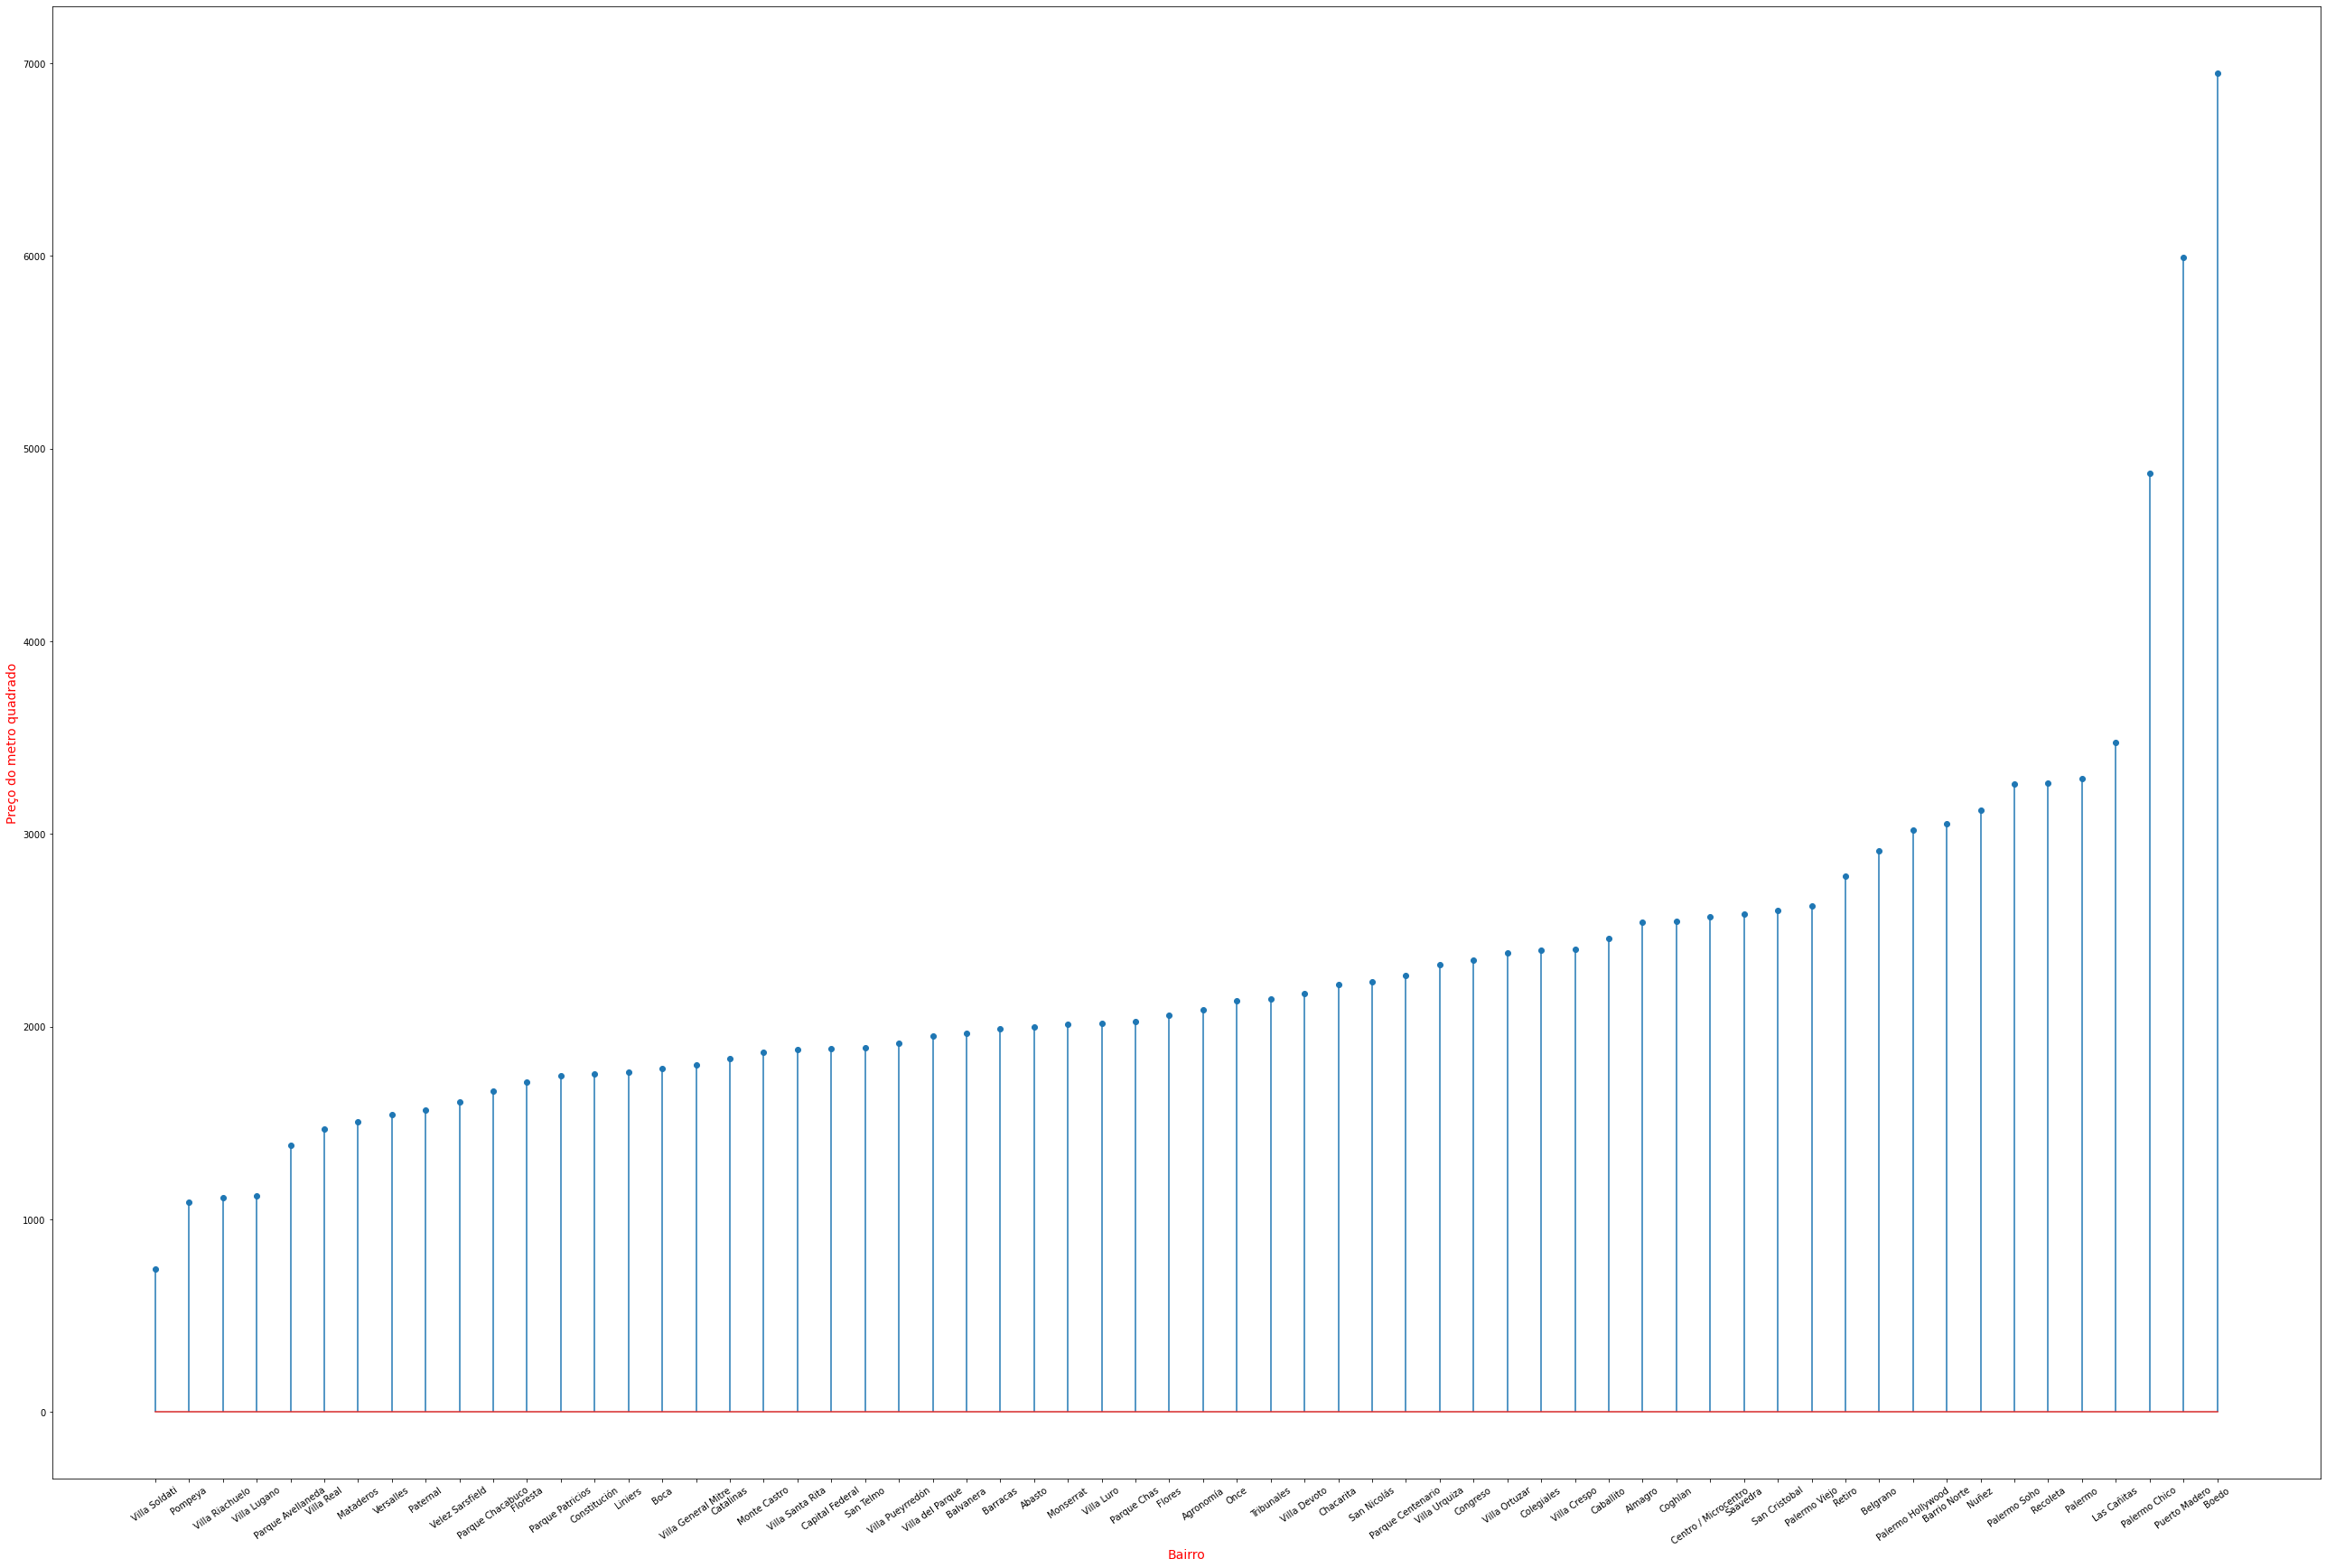

In [192]:
medias_bairro = medias_bairro.sort_values(by=['mean'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['mean'])
plt.xticks(rotation = 35)
plt.show()

<h5>3.1.2. Máximo do preço do metro quadrado por bairro</h5>

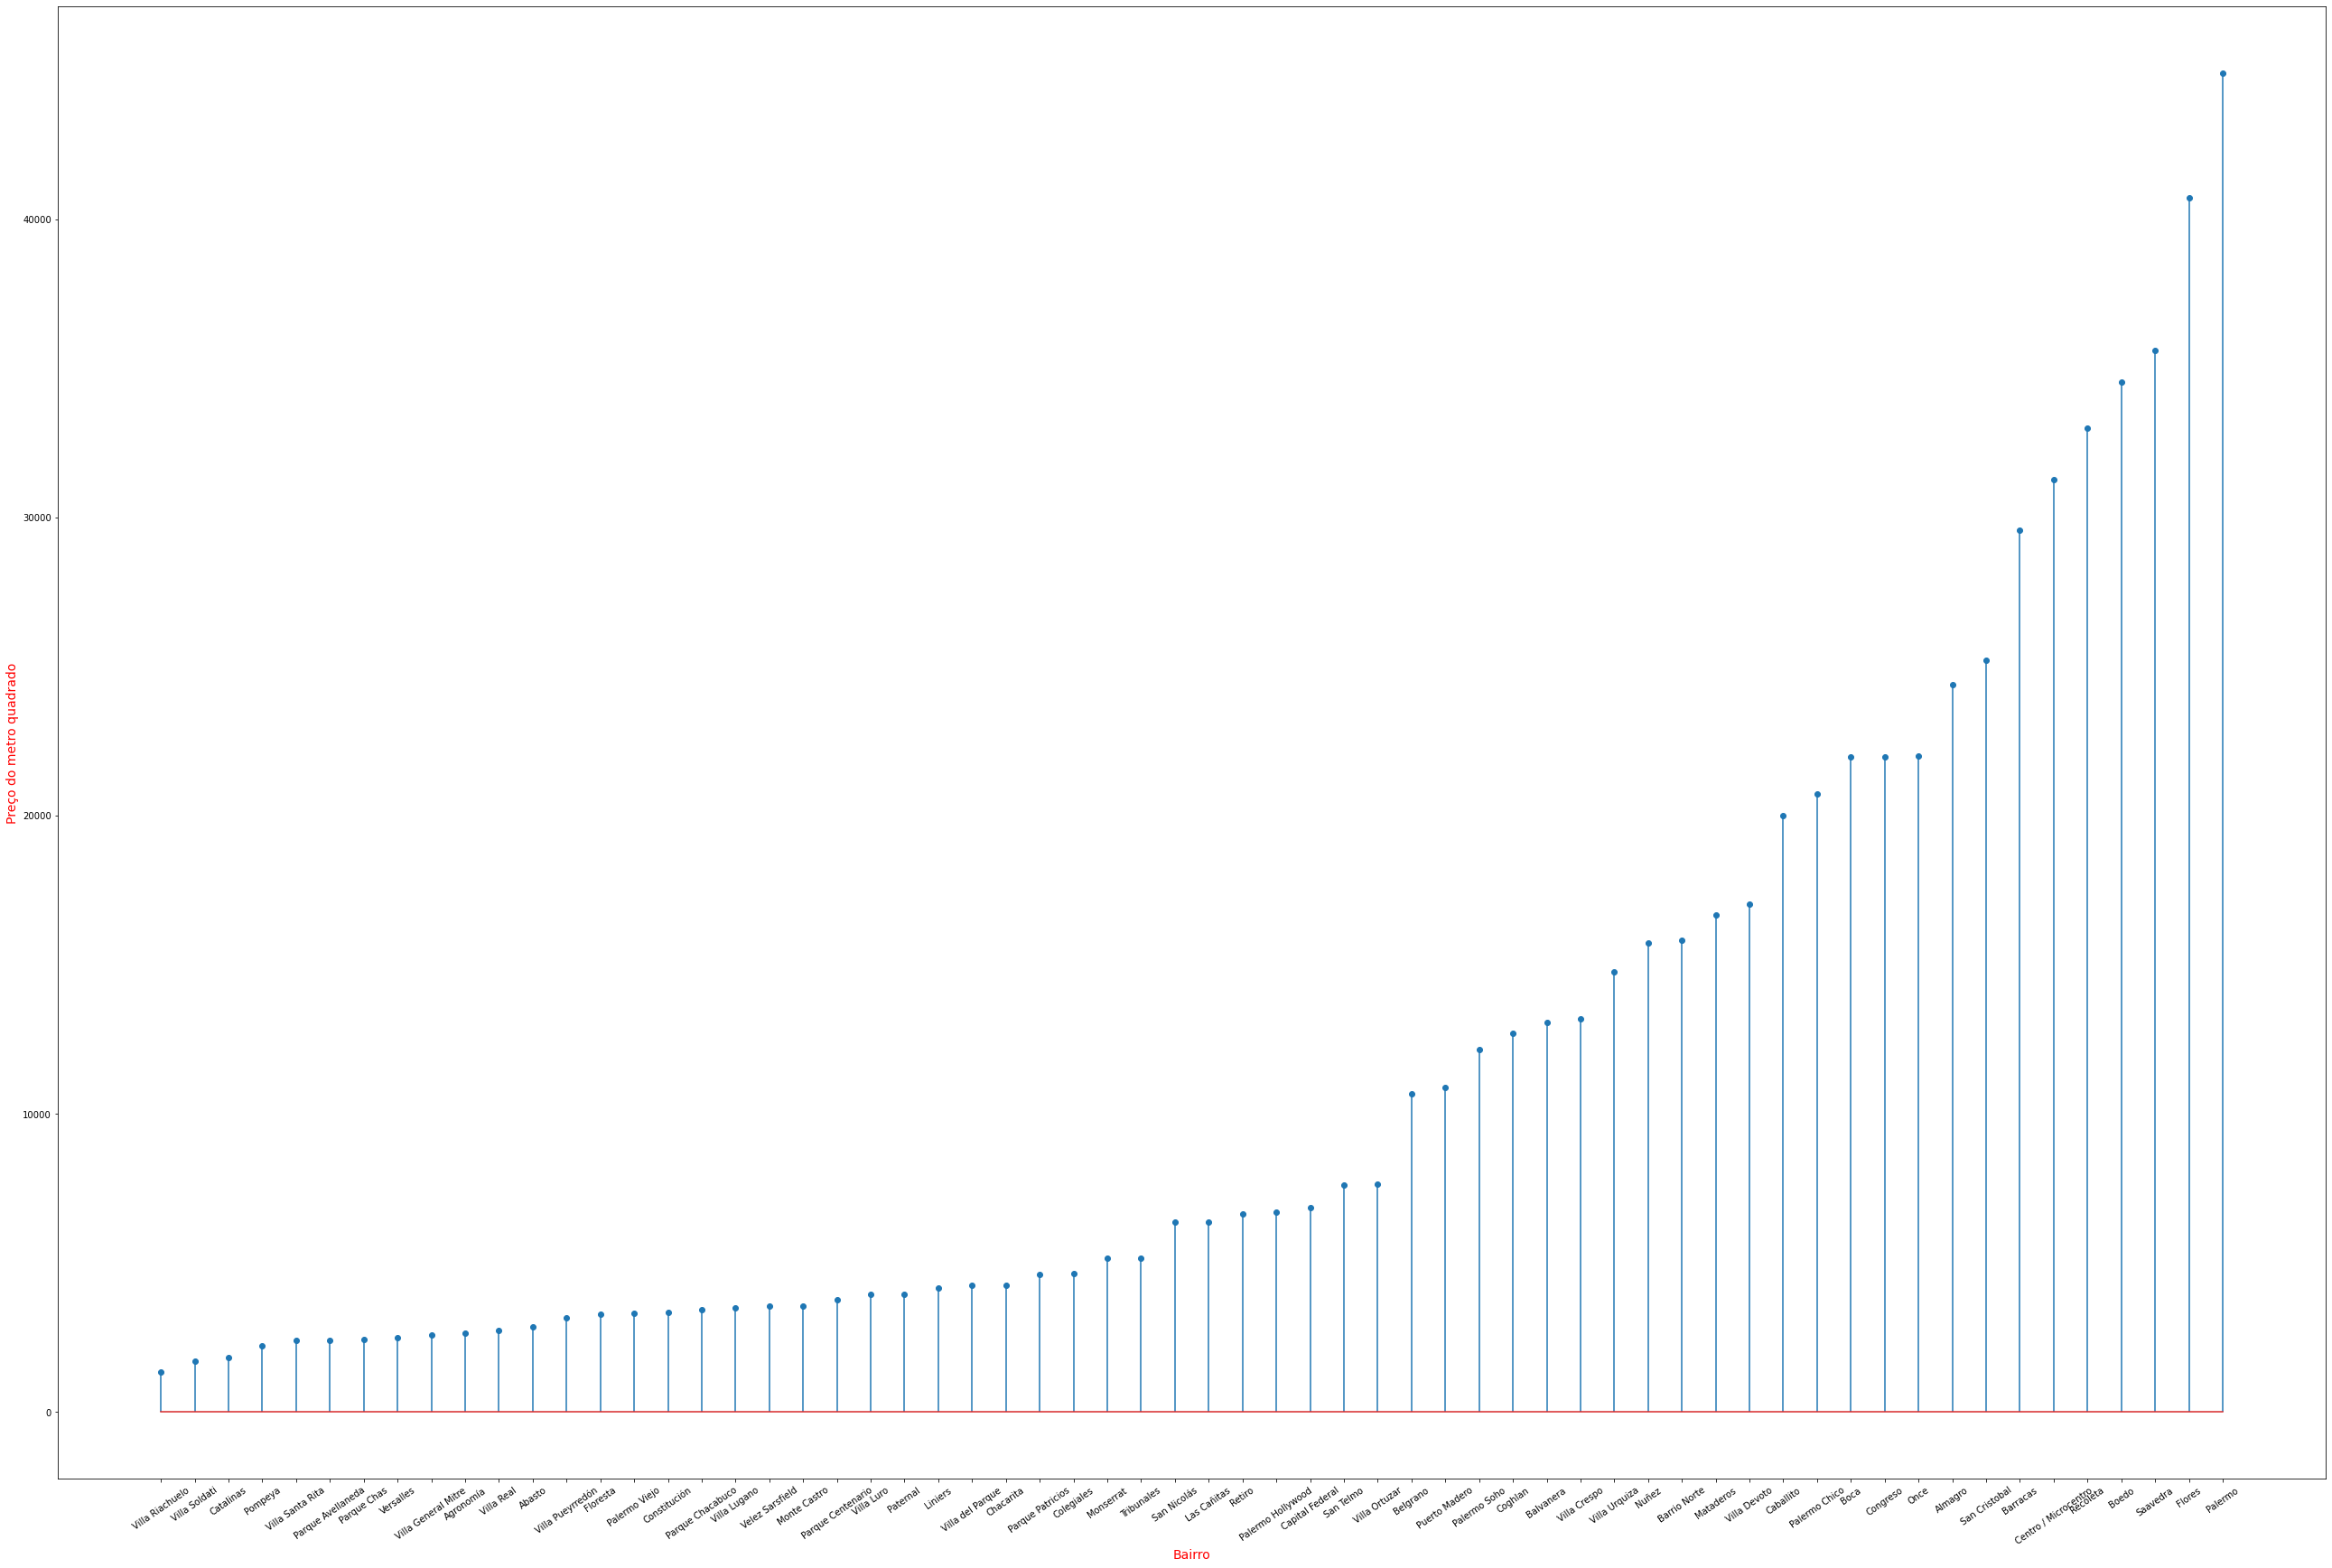

In [193]:
medias_bairro = medias_bairro.sort_values(by=['max'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['max'])
plt.xticks(rotation = 35)
plt.show()

<h5>3.1.3. Mínimo do preço do metro quadrado por bairro</h5>

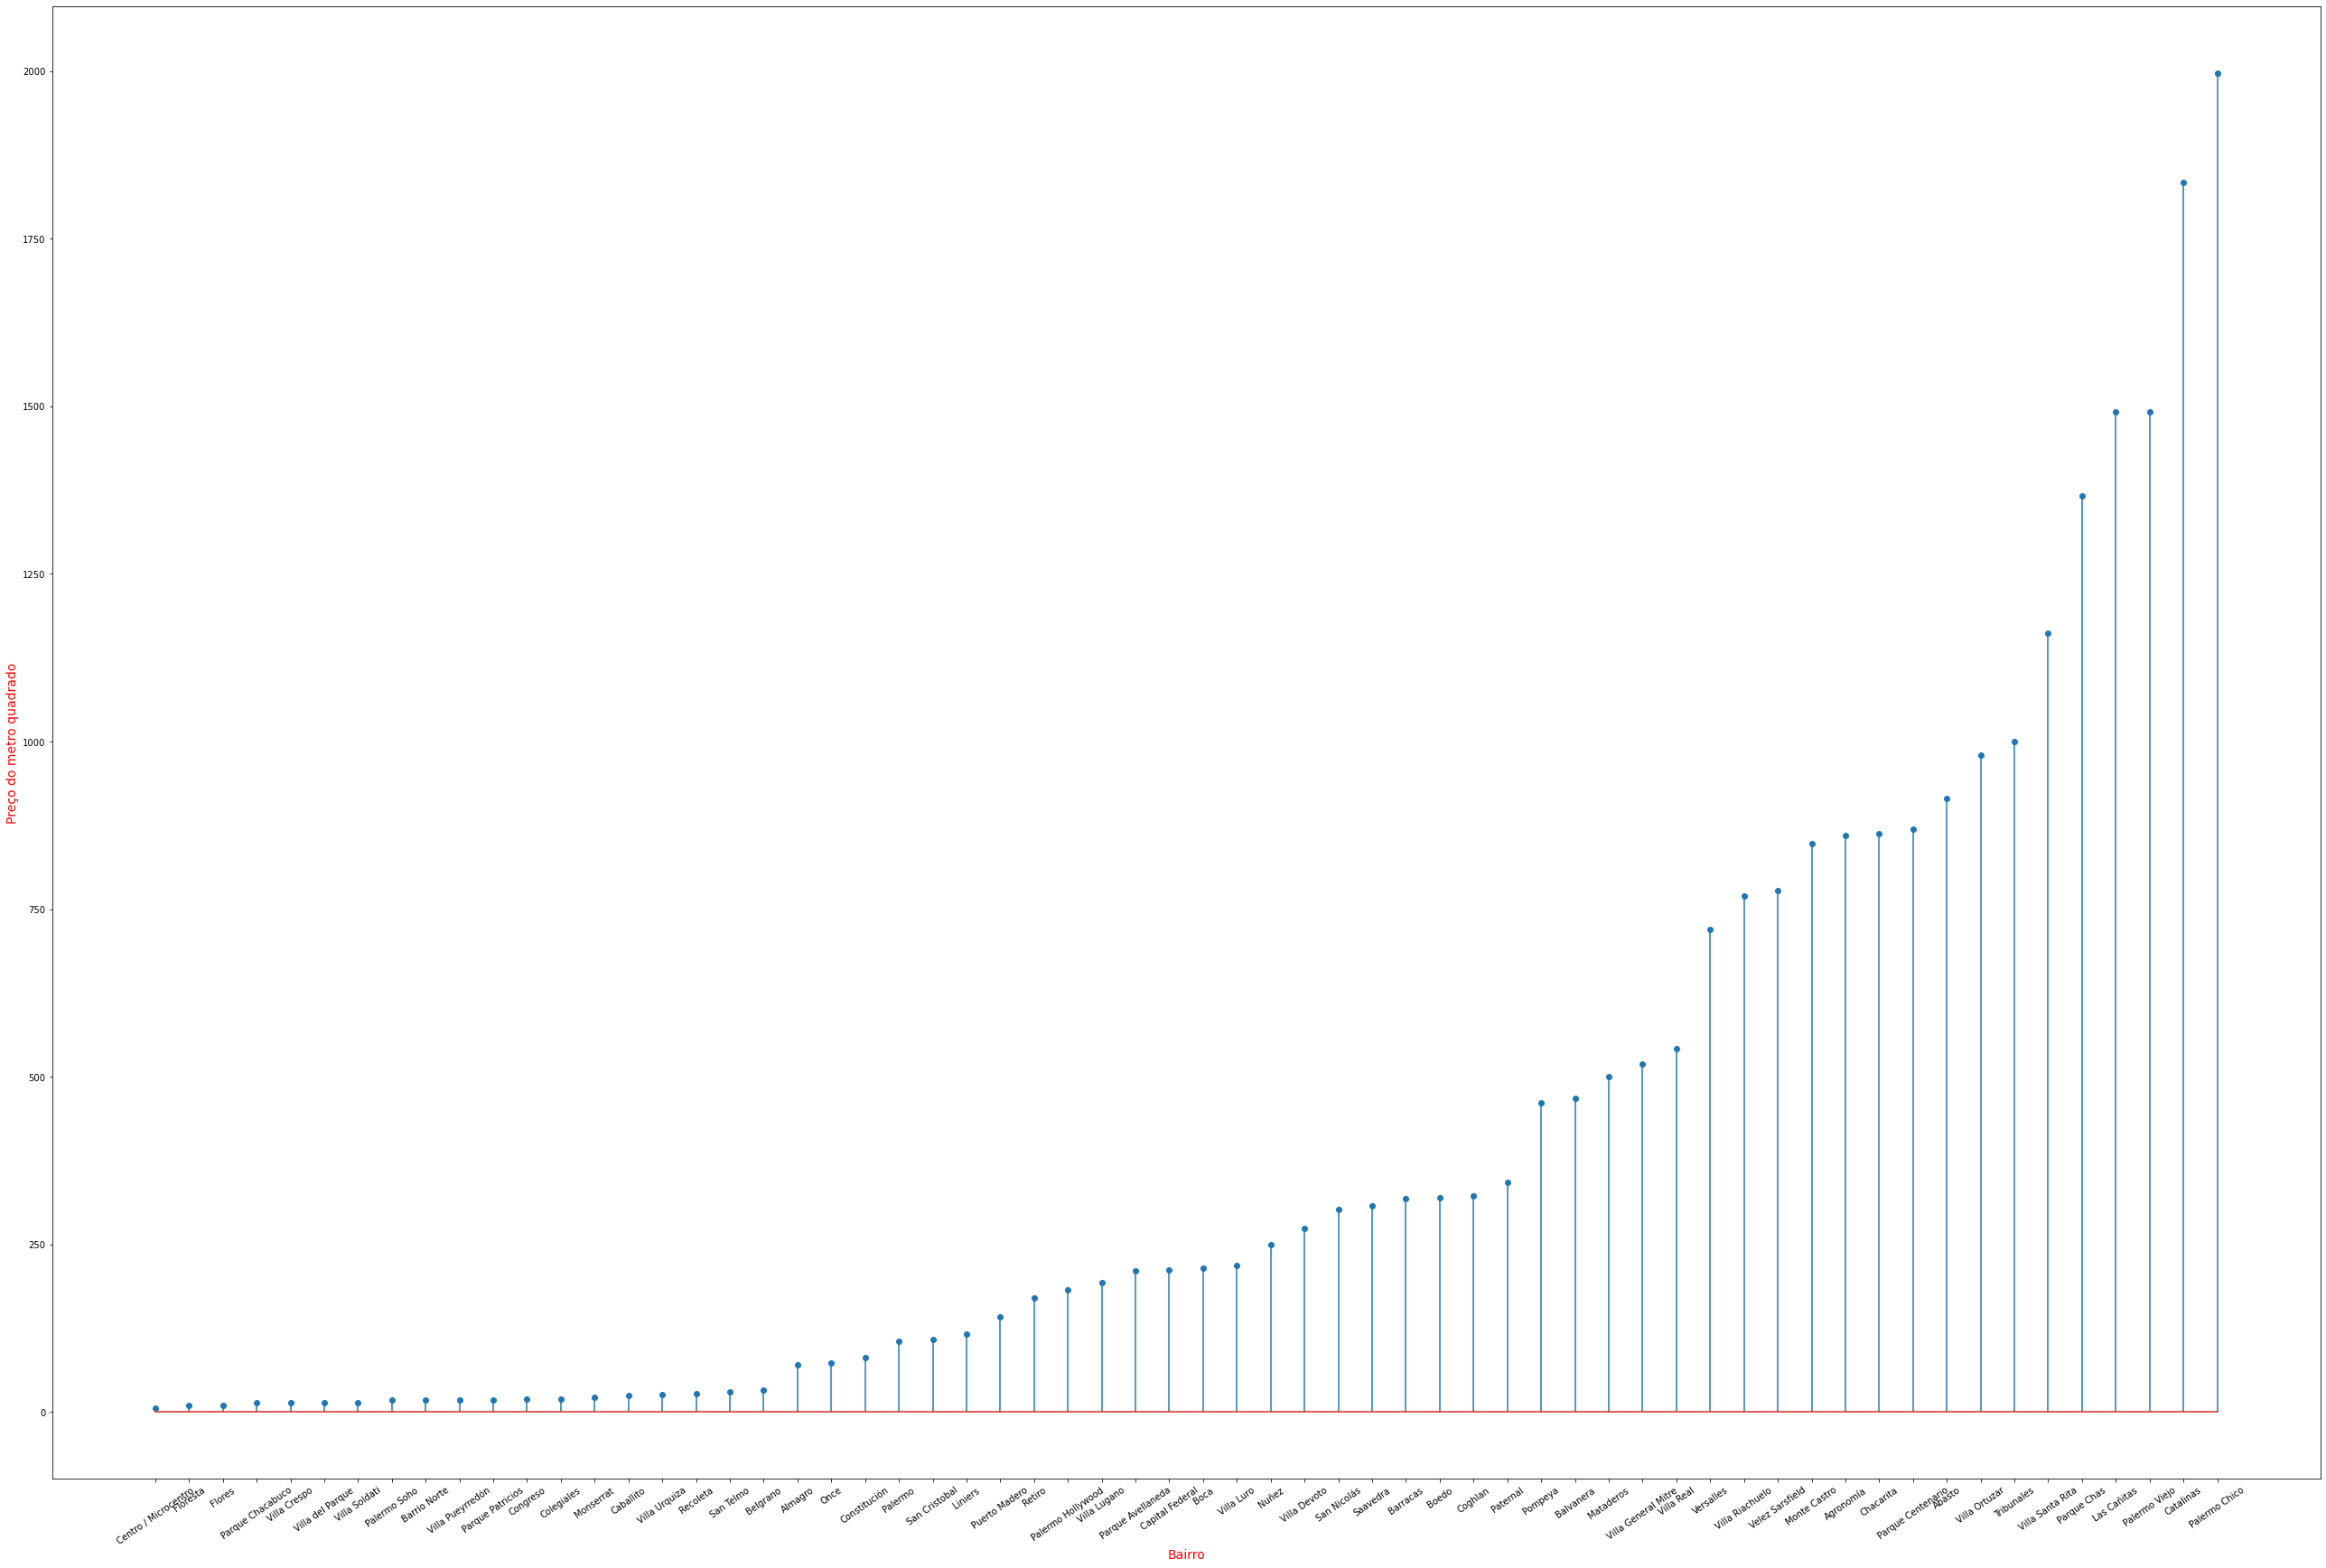

In [194]:
medias_bairro = medias_bairro.sort_values(by=['min'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['min'])
plt.xticks(rotation = 35)
plt.show()

<h4>3.2. Preço do metro quadrado por tipo</h4>

In [195]:
medias_tipos = dfmerge.groupby(['property_type'])['preco_metro'].agg(['max','min','mean','median'])
medias_tipos

,max,min,mean,median
property_type,,,,
PH,25000.000000,18.333333,1695.710007,1625.000000
apartment,44900.000000,10.493827,2796.213417,2458.333333
house,23064.516129,214.592275,1716.153891,1451.163795
store,22000.000000,6.054795,2794.256221,2258.064516


<h5>3.2.1. Media do preço do metro quadrado por tipo</h5>

<BarContainer object of 4 artists>

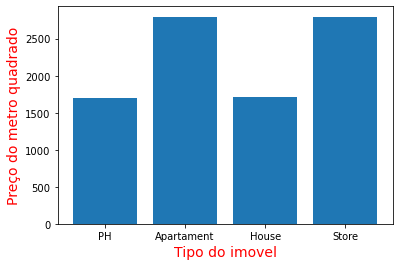

In [196]:
array = dfmerge.to_numpy()

PH = []
apartment = []
house = []
store = []

for i in range(len(array.T[0])):
    if array.T[0][i] == 'PH':
        PH.append(array.T[11][i])
    if array.T[0][i] == 'apartment':
        apartment.append(array.T[11][i])
    if array.T[0][i] == 'house':
        house.append(array.T[11][i])
    if array.T[0][i] == 'store':
        store.append(array.T[11][i])

media_PH = np.mean(PH)
media_ap = np.mean(apartment)
media_houseH = np.mean(house)
media_store = np.mean(store)

x = ['PH', 'Apartament', 'House', 'Store']

y = [media_PH, media_ap, media_houseH, media_store]


plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')

plt.bar (x, y)

<h5>3.2.2. Máximo do preço do metro quadrado por tipo</h5>

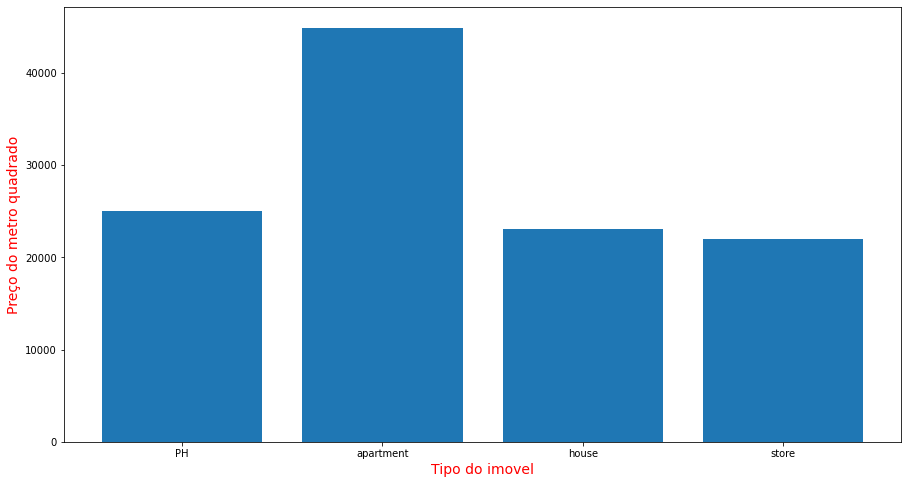

In [197]:
plt.figure(figsize = (15, 8))
plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.bar(medias_tipos.index, medias_tipos['max'])
plt.show()

<h5>3.2.3. Mínimo do preço do metro quadrado por tipo</h5>

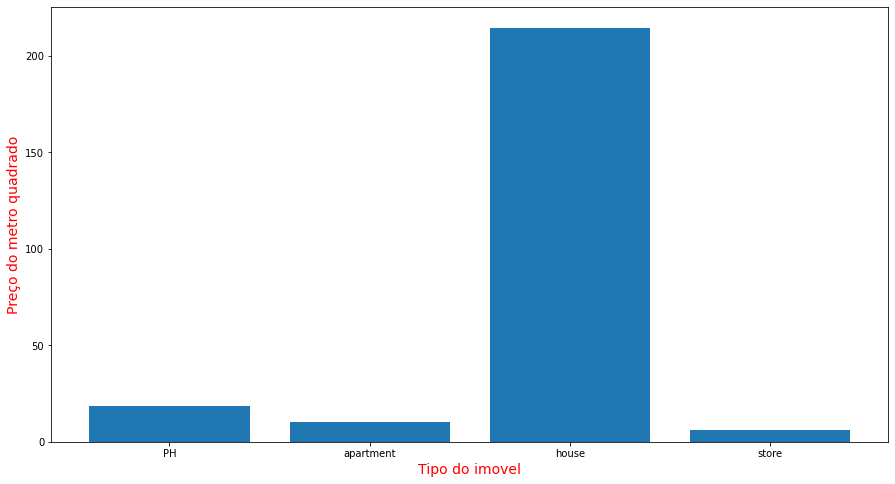

In [198]:
plt.figure(figsize = (15, 8))
plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.bar(medias_tipos.index, medias_tipos['min'])
plt.show()

<h4>3.3. Preço do metro quadrado por bairro e tipo</h4>

In [199]:
medias_bairro_tipos = dfmerge.groupby(['property_type','place_name'])['preco_metro'].agg(['max','min','mean','median'])
medias_bairro_tipos

max          min         mean  \
property_type place_name                                                
PH            Abasto            2400.000000   914.893617  1555.190277   
              Agronomía         2000.000000  1324.324324  1566.441441   
              Almagro           2738.095238   467.796610  1718.147054   
              Balvanera         1923.076923   467.796610  1382.313309   
              Barracas          2132.352941   590.219224  1245.198564   
...                                     ...          ...          ...   
store         Villa Ortuzar     2133.333333   979.381443  1561.804425   
              Villa Real        1346.153846  1346.153846  1346.153846   
              Villa Soldati      775.688994    13.797467   394.743231   
              Villa Urquiza     3687.943262  1045.454545  2354.089922   
              Villa del Parque  3289.473684    13.786585  1524.622315   

                                     median  
property_type place_name                     
PH            Abasto            1434.230769  
              Agronomía         1375.000000  
              Almagro           1677.272727  
              Balvanera         1350.147411  
              Barracas          1147.540984  
...                                     ...  
store         Villa Ortuzar     1567.251462  
              Villa Real        1346.153846  
              Villa Soldati      394.743231  
              Villa Urquiza     2198.797088  
              Villa del Parque  1400.000000  

[229 rows x 4 columns]

In [200]:
medias_bairro_tipos_final = medias_bairro_tipos.reset_index([ 'property_type','place_name' ])
medias_bairro_tipos_final['place_name_type'] = medias_bairro_tipos_final[['property_type', 'place_name']].apply(' '.join, axis=1)
medias_bairro_tipos_final

,property_type,place_name,max,min,mean,median,place_name_type
0,PH,Abasto,2400.000000,914.893617,1555.190277,1434.230769,PH Abasto
1,PH,Agronomía,2000.000000,1324.324324,1566.441441,1375.000000,PH Agronomía
2,PH,Almagro,2738.095238,467.796610,1718.147054,1677.272727,PH Almagro
3,PH,Balvanera,1923.076923,467.796610,1382.313309,1350.147411,PH Balvanera
4,PH,Barracas,2132.352941,590.219224,1245.198564,1147.540984,PH Barracas
...,...,...,...,...,...,...,...
224,store,Villa Ortuzar,2133.333333,979.381443,1561.804425,1567.251462,store Villa Ortuzar
225,store,Villa Real,1346.153846,1346.153846,1346.153846,1346.153846,store Villa Real
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati
227,store,Villa Urquiza,3687.943262,1045.454545,2354.089922,2198.797088,store Villa Urquiza


<h5>3.3.1. Media do preço do metro quadrado por bairro e tipo</h5>

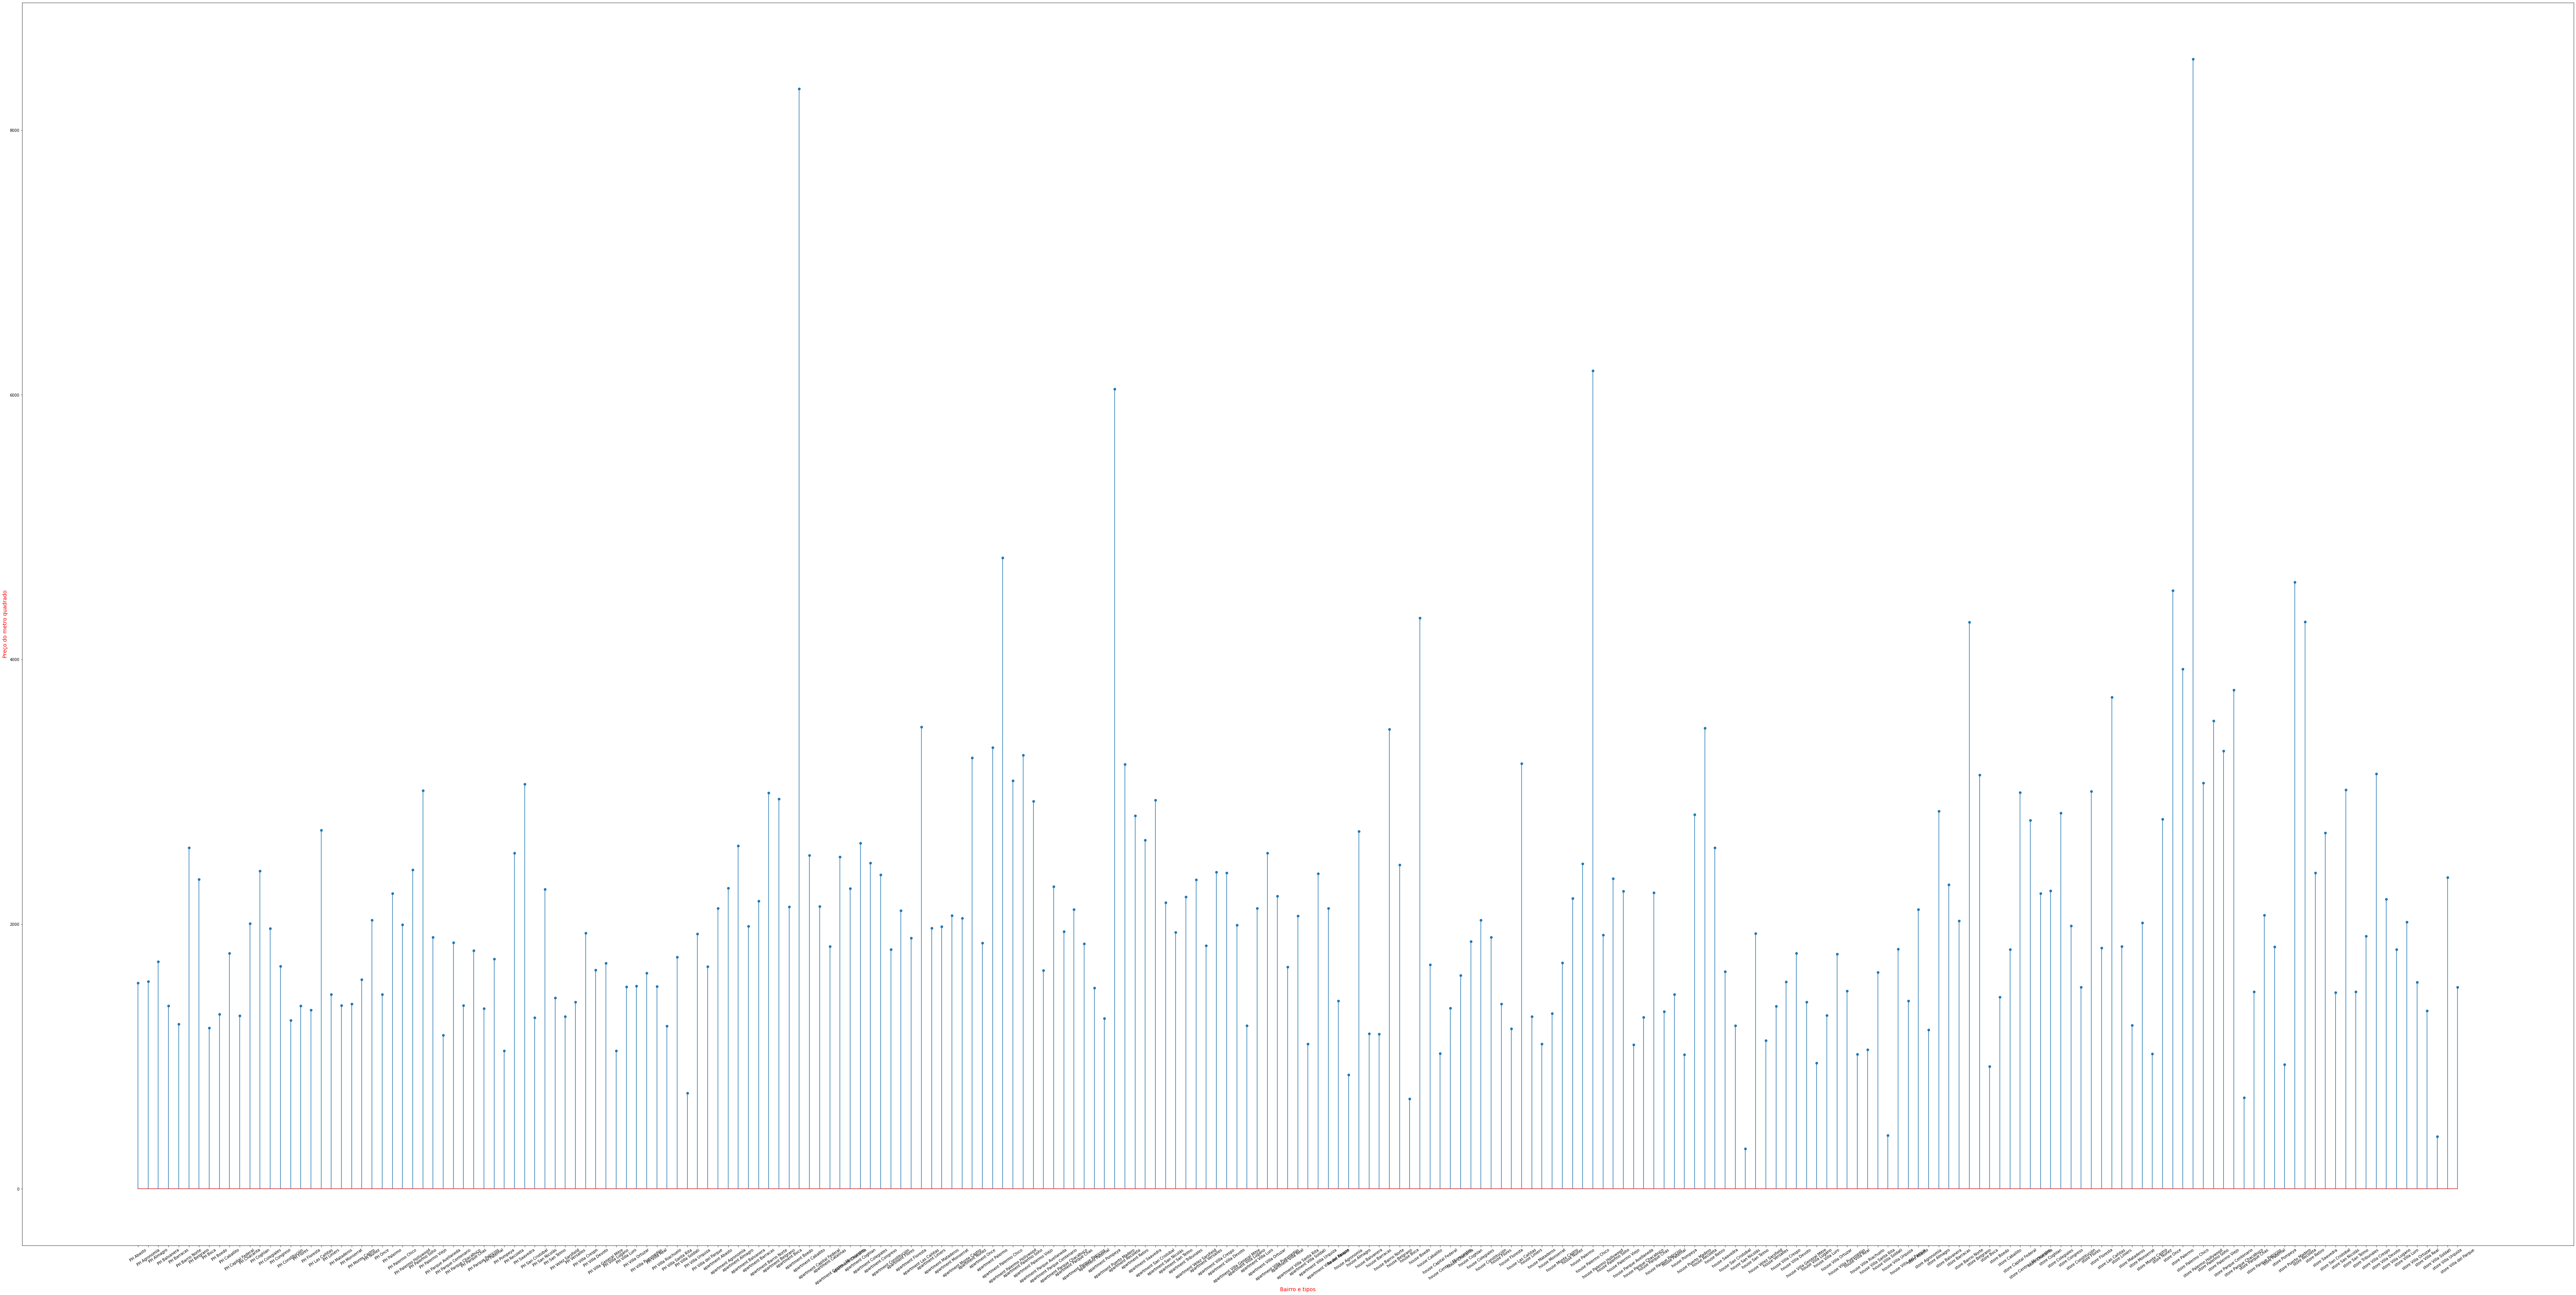

In [202]:
plt.figure(figsize = (120, 60))
plt.xlabel('Bairro e tipos', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro_tipos_final.place_name_type, medias_bairro_tipos_final['mean'])
plt.xticks(rotation = 35)
plt.show()

<h4>3.4. Mapa de calor</h4>

In [203]:
map_hooray = folium.Map(location=[-34.62, -58.4],
                    zoom_start = 11) # Uses lat then lon. The bigger the zoom number, the closer in you get
map_hooray # Calls the map to display
#heat_df = dfmerge[dfmerge['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = dfmerge[dfmerge['Year']=='2007'] # Reducing data size so it runs faster
heat_df = dfmerge[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

<p><h3>4. Os principais por preço do metro quadrado</h3></p>
<span>Demonstrar os cincos principais por valor do preço do metro quadrado</span>

<h4>4.1. Por localização do imovel</h4>

In [204]:
medias_bairro_ordenada= medias_bairro.sort_values(by=['mean'], ascending=False)
medias_bairro_ordenada

,max,min,mean,median
place_name,,,,
Boedo,34534.482759,320.362069,6949.329908,1951.219512
Puerto Madero,10869.565217,141.666667,5990.617770,5802.177964
Palermo Chico,20731.707317,1997.126437,4873.497964,4280.307802
Las Cañitas,6370.967742,1491.017964,3476.175811,3342.275281
Palermo,44900.000000,105.555556,3287.429045,3004.237288
...,...,...,...,...
Parque Avellaneda,2407.407407,211.111111,1384.643386,1428.571429
Villa Lugano,3478.260870,193.701923,1121.248006,1064.285714
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197


<h5>4.1.1. Maior custo por metro quadrado</h5>

In [205]:
medias_bairro_ordenada_5_maior=medias_bairro_ordenada.head(5)
medias_bairro_ordenada_5_maior

,max,min,mean,median
place_name,,,,
Boedo,34534.482759,320.362069,6949.329908,1951.219512
Puerto Madero,10869.565217,141.666667,5990.617770,5802.177964
Palermo Chico,20731.707317,1997.126437,4873.497964,4280.307802
Las Cañitas,6370.967742,1491.017964,3476.175811,3342.275281
Palermo,44900.000000,105.555556,3287.429045,3004.237288


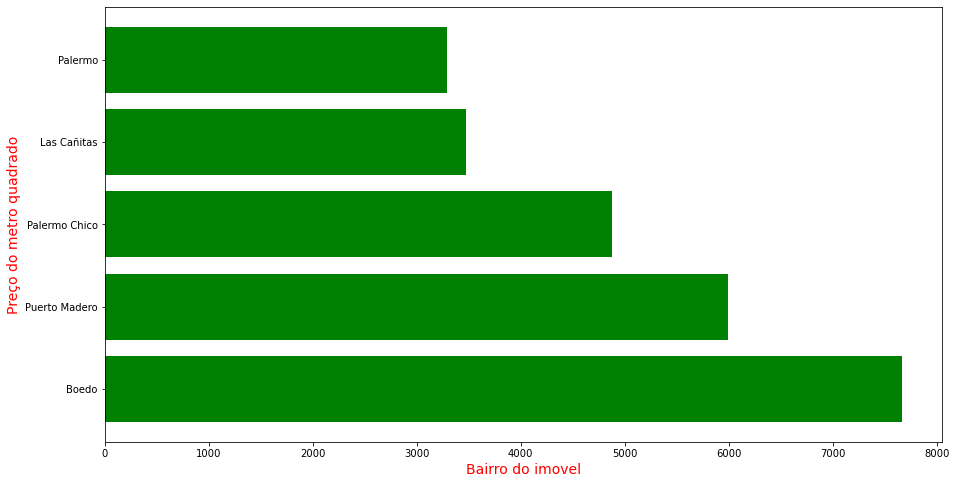

In [47]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.barh(medias_bairro_ordenada_5_maior.index, medias_bairro_ordenada_5_maior['mean'], color='green')
plt.show()

<h5>4.1.2. Menor custo por metro quadrado</h5>

In [206]:
medias_bairro_ordenada_5_menor=medias_bairro_ordenada.tail(5)
medias_bairro_ordenada_5_menor.sort_values(by=['mean'], ascending=True)

,max,min,mean,median
place_name,,,,
Villa Soldati,1720.000000,13.797467,743.666758,775.688994
Pompeya,2227.272727,461.538462,1090.532024,975.409836
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197
Villa Lugano,3478.260870,193.701923,1121.248006,1064.285714
Parque Avellaneda,2407.407407,211.111111,1384.643386,1428.571429


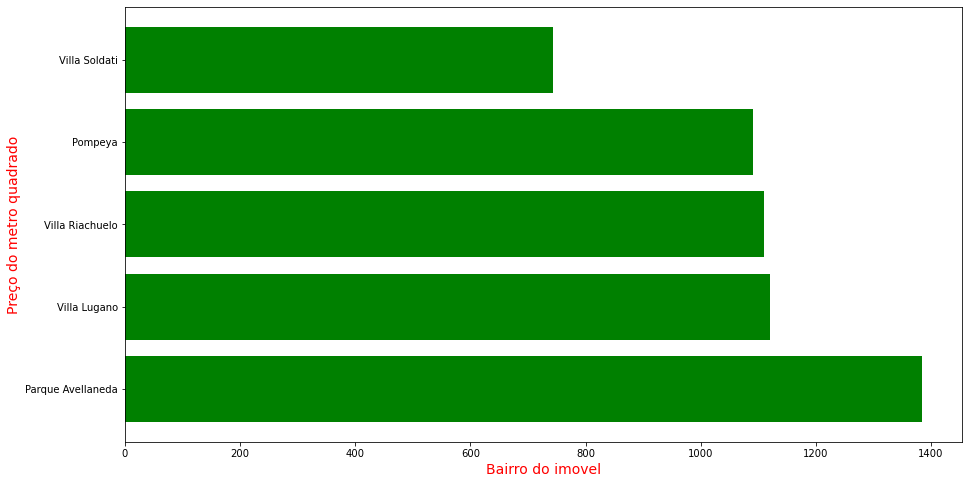

In [49]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.barh(medias_bairro_ordenada_5_menor.index, medias_bairro_ordenada_5_menor['mean'],color='green')
plt.show()

<h4>4.2. Por localização e tipo do imovel</h4>

In [207]:
medias_bairro_tipos_ordenada= medias_bairro_tipos_final.sort_values(by=['mean'], ascending=False)
medias_bairro_tipos_ordenada

,property_type,place_name,max,min,mean,median,place_name_type
202,store,Palermo Chico,8536.585366,8536.585366,8536.585366,8536.585366,store Palermo Chico
65,apartment,Boedo,34534.482759,320.362069,8313.162753,2200.000000,apartment Boedo
143,house,Palermo Chico,12121.212121,4417.177914,6183.271852,5527.777778,house Palermo Chico
96,apartment,Puerto Madero,10869.565217,2964.912281,6045.233312,5825.966153,apartment Puerto Madero
85,apartment,Palermo Chico,20731.707317,2322.580645,4769.882630,4177.927928,apartment Palermo Chico
...,...,...,...,...,...,...,...
207,store,Parque Chacabuco,722.543353,657.657658,690.100505,690.100505,store Parque Chacabuco
125,house,Boca,1423.357664,214.592275,678.966726,628.835307,house Boca
172,house,Villa Soldati,403.361345,403.361345,403.361345,403.361345,house Villa Soldati
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati


<h5>4.2.1. Maior custo por metro quadrado</h5>

In [208]:

medias_bairro_tipos_ordenada_5_maior=medias_bairro_tipos_ordenada.head(5)
medias_bairro_tipos_ordenada_5_maior


,property_type,place_name,max,min,mean,median,place_name_type
202,store,Palermo Chico,8536.585366,8536.585366,8536.585366,8536.585366,store Palermo Chico
65,apartment,Boedo,34534.482759,320.362069,8313.162753,2200.000000,apartment Boedo
143,house,Palermo Chico,12121.212121,4417.177914,6183.271852,5527.777778,house Palermo Chico
96,apartment,Puerto Madero,10869.565217,2964.912281,6045.233312,5825.966153,apartment Puerto Madero
85,apartment,Palermo Chico,20731.707317,2322.580645,4769.882630,4177.927928,apartment Palermo Chico


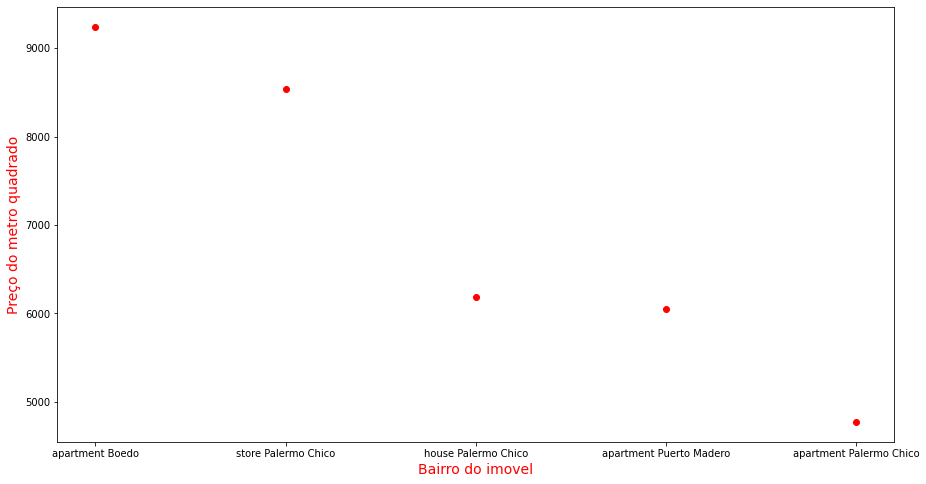

In [98]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.scatter(medias_bairro_tipos_ordenada_5_maior.place_name_type, medias_bairro_tipos_ordenada_5_maior['mean'],color='red')
plt.show()

<h5>4.2.2. Menor custo por metro quadrado</h5>

In [209]:
medias_bairro_tipos_ordenada_5_menor=medias_bairro_tipos_ordenada.tail(5)
medias_bairro_tipos_ordenada_5_menor.sort_values(by=['mean'], ascending=True)

,property_type,place_name,max,min,mean,median,place_name_type
158,house,San Nicolás,301.984469,301.984469,301.984469,301.984469,house San Nicolás
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati
172,house,Villa Soldati,403.361345,403.361345,403.361345,403.361345,house Villa Soldati
125,house,Boca,1423.357664,214.592275,678.966726,628.835307,house Boca
207,store,Parque Chacabuco,722.543353,657.657658,690.100505,690.100505,store Parque Chacabuco


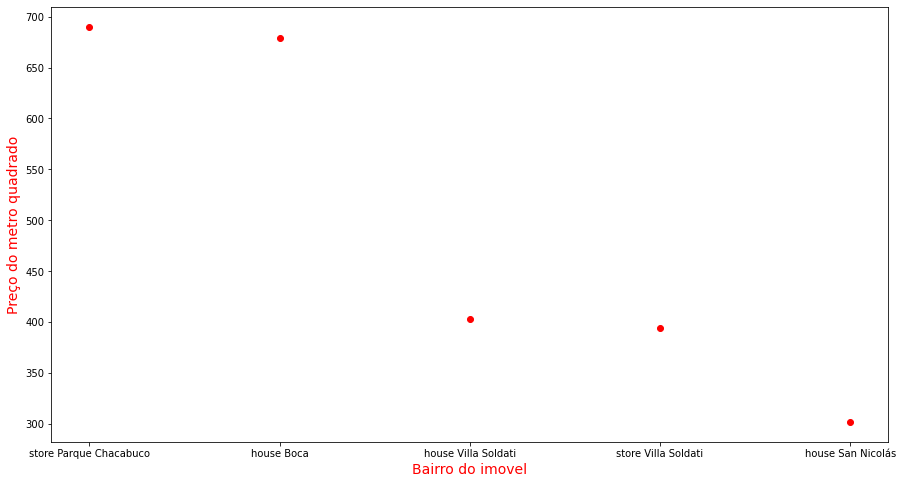

In [53]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.scatter(medias_bairro_tipos_ordenada_5_menor.place_name_type, medias_bairro_tipos_ordenada_5_menor['mean'],color='red')
plt.show()

<p><h3>5. Desvio padrão</h3></p>
<span>Demonstrar a variação média de preços por m²</span>


In [268]:
desvio_bairro_tipos = dfmerge.groupby(['property_type','place_name'])['preco_metro'].agg(['mad'])
desvio_bairro_tipos

mad
property_type place_name                  
PH            Abasto            454.657302
              Agronomía         289.039039
              Almagro           487.072439
              Balvanera         299.958719
              Barracas          312.182559
...                                    ...
store         Villa Ortuzar     294.335926
              Villa Real          0.000000
              Villa Soldati     380.945764
              Villa Urquiza     878.782188
              Villa del Parque  809.728752

[229 rows x 1 columns]

In [211]:
desvio_bairro_tipos = desvio_bairro_tipos.reset_index([ 'property_type','place_name' ])
desvio_bairro_tipos['place_name_type'] = desvio_bairro_tipos[['property_type', 'place_name']].apply(' '.join, axis=1)


In [212]:
desvio_bairro_tipos_ordenada = desvio_bairro_tipos.sort_values(by=['mad'], ascending=False)
desvio_bairro_tipos_ordenada

,property_type,place_name,mad,place_name_type
65,apartment,Boedo,8227.884848,apartment Boedo
126,house,Boedo,4810.036356,house Boedo
200,store,Once,4023.661347,store Once
100,apartment,San Cristobal,2198.091560,apartment San Cristobal
180,store,Barrio Norte,2192.660163,store Barrio Norte
...,...,...,...,...
172,house,Villa Soldati,0.000000,house Villa Soldati
202,store,Palermo Chico,0.000000,store Palermo Chico
206,store,Parque Centenario,0.000000,store Parque Centenario
205,store,Palermo Viejo,0.000000,store Palermo Viejo


<h5> 5.1 Tipos/região com maiores desvio padrão de preço médio por m²</h5>

In [213]:
desvio_bairro_tipos_5 = desvio_bairro_tipos_ordenada.head(5)
desvio_bairro_tipos_5

,property_type,place_name,mad,place_name_type
65,apartment,Boedo,8227.884848,apartment Boedo
126,house,Boedo,4810.036356,house Boedo
200,store,Once,4023.661347,store Once
100,apartment,San Cristobal,2198.091560,apartment San Cristobal
180,store,Barrio Norte,2192.660163,store Barrio Norte


<BarContainer object of 5 artists>

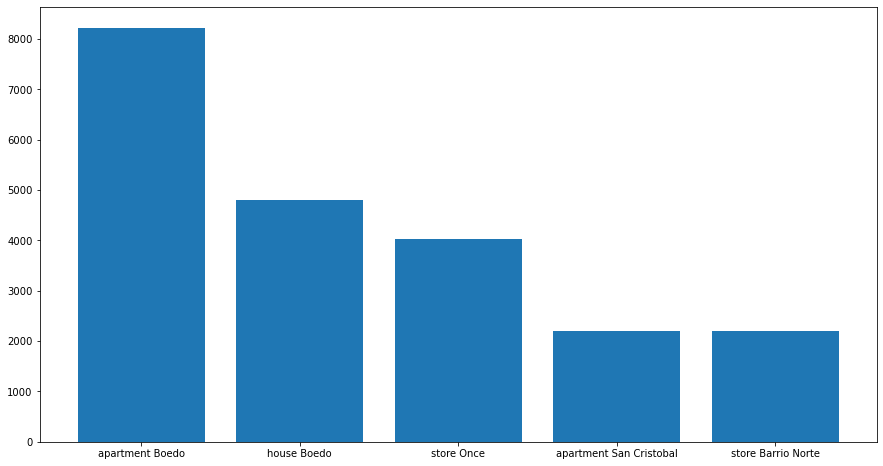

In [214]:
plt.figure(figsize = (15, 8))
plt.bar(desvio_bairro_tipos_5.place_name_type, desvio_bairro_tipos_5['mad'])



<h5> 5.1 5 Grafico de desvio padrão do preço por tipo de propriedade</h5>

In [215]:
desvio_tipos = dfmerge.groupby(['property_type'])['preco_metro'].agg(['mad','mean'])

desvio_tipos = desvio_tipos.reset_index([ 'property_type' ])

desvio_tipos

,property_type,mad,mean
0,PH,502.714239,1695.710007
1,apartment,983.937953,2796.213417
2,house,747.064975,1716.153891
3,store,1449.409596,2794.256221


<BarContainer object of 4 artists>

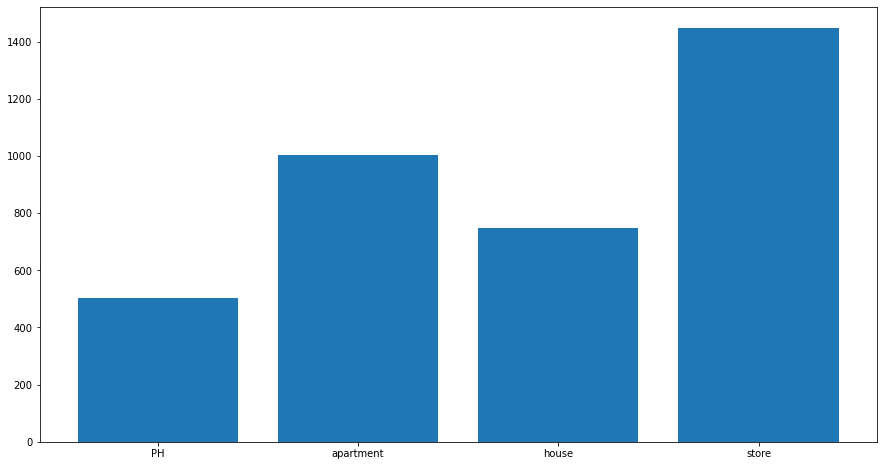

In [158]:
plt.figure(figsize = (15, 8))
plt.bar(desvio_tipos.property_type, desvio_tipos['mad'])

<h5> 5.2 Desvio padrão do preço médio por m² dos 5 bairros com maior desvio</h5>

In [216]:
desvio_bairro = dfmerge.groupby(['place_name'])['preco_metro'].agg(['mad'])
desvio_bairro = desvio_bairro.reset_index(['place_name' ])
desvio_bairro_ordenada = desvio_bairro.sort_values(by=['mad'], ascending=False)
desvio_bairro_ordenada

,place_name,mad
8,Boedo,7452.754128
43,San Cristobal,1784.900828
28,Palermo Chico,1470.363597
39,Puerto Madero,1066.630577
2,Almagro,1029.101652
...,...,...
59,Villa Soldati,311.201080
48,Versalles,284.871772
57,Villa Riachuelo,227.639998
35,Parque Chas,219.602001


<BarContainer object of 5 artists>

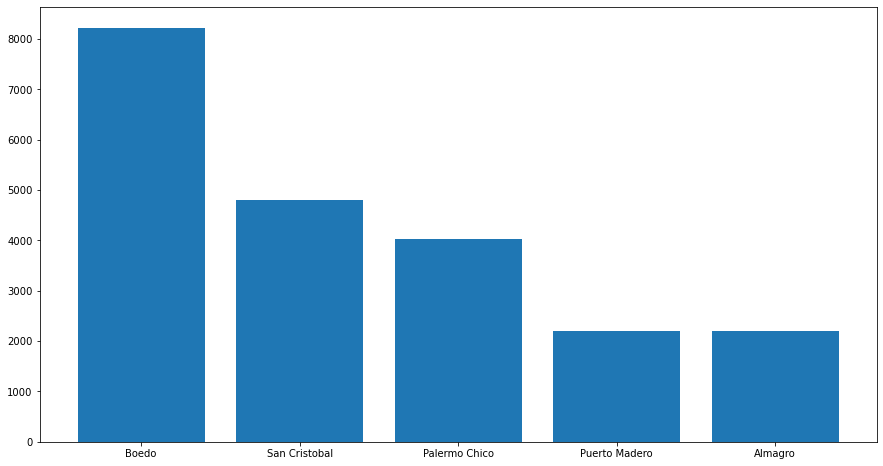

In [217]:
desvio_bairro_5 = desvio_bairro_ordenada.head(5)

plt.figure(figsize = (15, 8))
plt.bar(desvio_bairro_5.place_name, desvio_bairro_tipos_5['mad'])

<p><h3>6. Boxplot</h3></p>

In [220]:
#criei uma tabela para cada tipo

df_PH = dfmerge[dfmerge['property_type'].isin(['PH'])]

df_apartment = dfmerge[dfmerge['property_type'].isin(['apartment'])]

df_house = dfmerge[dfmerge['property_type'].isin(['house'])]

df_store = dfmerge[dfmerge['property_type'].isin(['store'])]


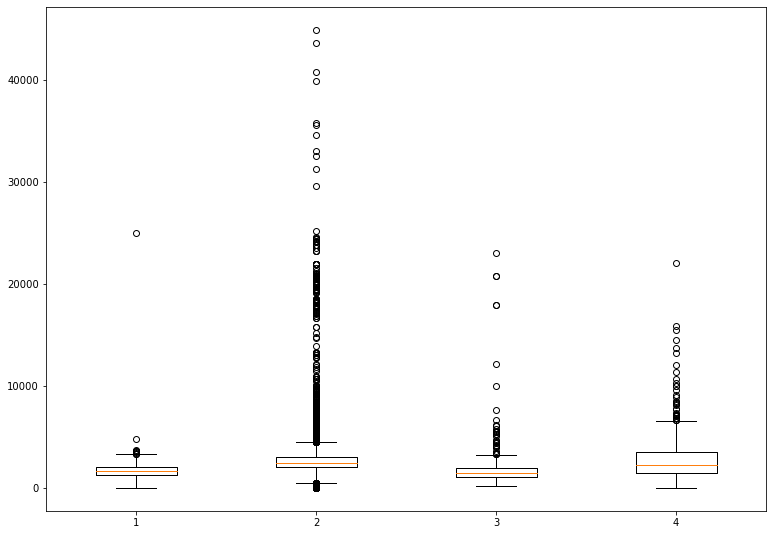

In [219]:
data_PH = df_PH['preco_metro'].tolist()
data_apartment = df_apartment['preco_metro'].tolist()
data_house = df_house['preco_metro'].tolist()
data_store = df_store['preco_metro'].tolist()

data_boxplot = [data_PH, data_apartment, data_house, data_store]

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data_boxplot)

plt.show()

<h3>7 Macros Região</h3>

<h4>7.1 Metros quadrados totais por bairro</h4>

In [309]:
soma_bairros = dfmerge.groupby(['place_name'])['surface_total_in_m2_Final'].agg(['sum'])
soma_bairros_ordenado = soma_bairros.sort_values(by=['sum'], ascending=False)


soma_bairros_ordenado

,sum
place_name,
San Telmo,258565.000000
Belgrano,170015.000000
Palermo,149636.000000
Recoleta,130493.892209
Caballito,113526.985075
...,...
Agronomía,2379.000000
Parque Chas,1315.000000
Palermo Viejo,956.000000


In [311]:
soma_bairros_9 = soma_bairros_ordenado.head(9)
soma_bairros_9 = soma_bairros_9.reset_index(['place_name'])

soma_bairros_9

,place_name,sum
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000


In [270]:
todos = soma_bairros_ordenado[9:62].agg(['sum',])
todos


,sum
sum,917695.714407


In [319]:
soma_bairros_10 = soma_bairros_9.append(todos)


soma_bairros_final = soma_bairros_10.fillna('Outros')

soma_bairros_final

C:\Users\a1adv\AppData\Local\Temp\ipykernel_14316\3689649083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soma_bairros_10 = soma_bairros_9.append(todos)


,place_name,sum
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000
sum,Outros,917695.714407


In [329]:
# convert_dict = {'sum': int}

# soma_bairros_final = soma_bairros_final.astype(convert_dict)

soma_bairros_final = soma_bairros_10

soma_bairros_final.rename(columns = {'sum':'Soma'}, inplace = True)

soma_bairros_final = soma_bairros_10.fillna('Outros')

soma_bairros_final

,place_name,Soma
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000
sum,Outros,917695.714407


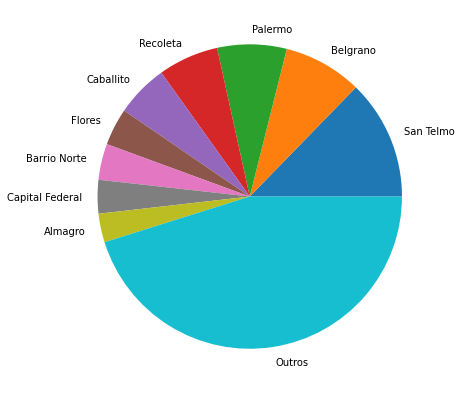

In [342]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(soma_bairros_final.Soma, labels = soma_bairros_final.place_name)
plt.show()

<h4>7.2 Captal total por bairro</h4>

In [352]:
soma_preco = dfmerge.groupby(['place_name'])['price_usd'].agg(['sum'])
soma_preco_ordenado = soma_preco.sort_values(by=['sum'], ascending=False)

soma_preco_9 = soma_preco_ordenado.head(9)
soma_preco_9 = soma_preco_9.reset_index(['place_name'])

todos_preco = soma_preco_ordenado[9:62].agg(['sum',])
todos_preco

soma_preco_10 = soma_bairros_9.append(todos_preco)

soma_preco_final = soma_preco_10.fillna('Outros')
soma_preco_final


C:\Users\a1adv\AppData\Local\Temp\ipykernel_14316\2230059587.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soma_preco_10 = soma_bairros_9.append(todos_preco)


,place_name,sum
0,San Telmo,2.585650e+05
1,Belgrano,1.700150e+05
2,Palermo,1.496360e+05
3,Recoleta,1.304939e+05
4,Caballito,1.135270e+05
5,Flores,8.039000e+04
6,Barrio Norte,7.785537e+04
7,Capital Federal,7.252700e+04
8,Almagro,6.190800e+04
sum,Outros,1.828745e+09


In [353]:
soma_preco_final.rename(columns = {'sum':'Soma'}, inplace = True)
soma_preco_final

,place_name,Soma
0,San Telmo,2.585650e+05
1,Belgrano,1.700150e+05
2,Palermo,1.496360e+05
3,Recoleta,1.304939e+05
4,Caballito,1.135270e+05
5,Flores,8.039000e+04
6,Barrio Norte,7.785537e+04
7,Capital Federal,7.252700e+04
8,Almagro,6.190800e+04
sum,Outros,1.828745e+09


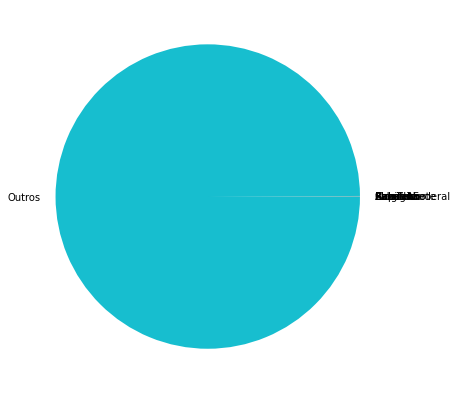

In [354]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(soma_preco_final.Soma, labels = soma_preco_final.place_name)
plt.show()